In [3]:
def mol_with_atom_index(mol):
  for atom in mol.GetAtoms():
    atom.SetAtomMapNum(atom.GetIdx())
  return mol

In [4]:
from urllib.request import urlopen
from urllib.parse import quote

def CIRconvert(ids):
  try:
    url = 'https://cactus.nci.nih.gov/chemical/structure/' + quote(ids) + '/smiles'
    ans = urlopen(url).read().decode('utf8')
    return ans
  except:
    return 'Did not work'

In [5]:

!pip install rdkit-pypi

Defaulting to user installation because normal site-packages is not writeable


Enter primary protien compoud1 of caraway seeds  : (+)-carvone
CC(=C)[C@H]1CC=C(C)C(=O)C1


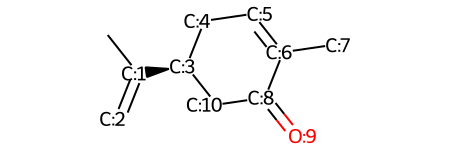

In [6]:
from rdkit import Chem
p__c1_name1 = input("Enter primary protien compoud1 of caraway seeds  : ")
s_c1_formula1 = CIRconvert(p__c1_name1)
print(s_c1_formula1)
mol1 = Chem.MolFromSmiles(s_c1_formula1)
mol_with_atom_index(mol1)

Enter primary protien compoud1 of spearmint oil :  (-)-carvone
CC(=C)[C@@H]1CC=C(C)C(=O)C1


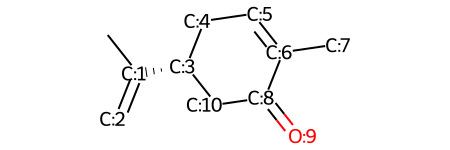

In [8]:
from rdkit import Chem
p__c1_name2 = input("Enter primary protien compoud1 of spearmint oil : ")
s_c1_formula2 = CIRconvert(p__c1_name2)
print(s_c1_formula2)
mol2 = Chem.MolFromSmiles(s_c1_formula2)
mol_with_atom_index(mol2)

In [9]:
from rdkit.Chem.EnumerateStereoisomers import EnumerateStereoisomers,StereoEnumerationOptions
isomers = tuple(EnumerateStereoisomers(mol1))
len(isomers)

1

In [10]:
from rdkit import Chem
for smi in sorted(Chem.MolToSmiles(x,isomericSmiles=True)for x in isomers):
    print(smi)
    isomer=Chem.MolFromSmiles(smi)
    mol_with_atom_index(isomer)

C[C:1](=[CH2:2])[C@@H:3]1[CH2:4][CH:5]=[C:6]([CH3:7])[C:8](=[O:9])[CH2:10]1


In [11]:
pip install pysmiles

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.



In [13]:
from pysmiles import read_smiles
import networkx as nx
smiles='CCCC'
mol_1=read_smiles(s_c1_formula1)
mol_2=read_smiles(s_c1_formula2)

nodes_c1 =mol_1.nodes(data='element')
nodes_c2=mol_2.nodes(data='element')
adj_matrix_c1=nx.to_numpy_matrix(mol_1)

adj_matrix_c2=nx.to_numpy_matrix(mol_2)
print(nodes_c1)
print(adj_matrix_c1)

print(nodes_c2)
print(adj_matrix_c2)

Atom "[C@@H]" contains stereochemical information that will be discarded.
Atom "[C@@H]" contains stereochemical information that will be discarded.


[(0, 'C'), (1, 'C'), (2, 'C'), (3, 'C'), (4, 'C'), (5, 'C'), (6, 'C'), (7, 'C'), (8, 'C'), (9, 'O'), (10, 'C')]
[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0.]]
[(0, 'C'), (1, 'C'), (2, 'C'), (3, 'C'), (4, 'C'), (5, 'C'), (6, 'C'), (7, 'C'), (8, 'C'), (9, 'O'), (10, 'C')]
[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0.

In [14]:
pip install networkx

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [15]:
from networkx.algorithms import isomorphism
G1=nx.from_numpy_matrix(adj_matrix_c1)
G2=nx.from_numpy_matrix(adj_matrix_c2)
GM=isomorphism.GraphMatcher(G1,G2)
GM.is_isomorphic()

True

Enter primary protien compoud2 of caraway seeds  : dl-limonene
CC(=C)C1CCC(=CC1)C


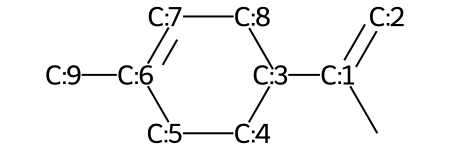

In [16]:
from rdkit import Chem
p__c2_name1 = input("Enter primary protien compoud2 of caraway seeds  : ")
s_c2_formula1 = CIRconvert(p__c2_name1)
print(s_c2_formula1)
mol1 = Chem.MolFromSmiles(s_c2_formula1)
mol_with_atom_index(mol1)

Enter primary protien compoud2 of spearmint oil : limonene
CC(=C)C1CCC(=CC1)C


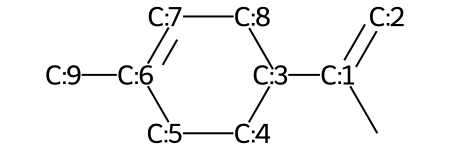

In [17]:
from rdkit import Chem
p__c2_name2 = input("Enter primary protien compoud2 of spearmint oil : ")
s_c2_formula2 = CIRconvert(p__c2_name2)
print(s_c2_formula2)
mol2 = Chem.MolFromSmiles(s_c2_formula2)
mol_with_atom_index(mol2)

In [18]:
from rdkit.Chem.EnumerateStereoisomers import EnumerateStereoisomers,StereoEnumerationOptions
isomers = tuple(EnumerateStereoisomers(mol1))
len(isomers)

2

In [19]:
from rdkit import Chem
for smi in sorted(Chem.MolToSmiles(x,isomericSmiles=True)for x in isomers):
    print(smi)
    isomer=Chem.MolFromSmiles(smi)
    mol_with_atom_index(isomer)

C[C:1](=[CH2:2])[C@@H:3]1[CH2:4][CH2:5][C:6]([CH3:9])=[CH:7][CH2:8]1
C[C:1](=[CH2:2])[C@H:3]1[CH2:4][CH2:5][C:6]([CH3:9])=[CH:7][CH2:8]1


In [20]:
from pysmiles import read_smiles
import networkx as nx
smiles='CCCC'
mol_1=read_smiles(s_c2_formula1)
mol_2=read_smiles(s_c2_formula2)

nodes_c1 =mol_1.nodes(data='element')
nodes_c2=mol_2.nodes(data='element')
adj_matrix_c1=nx.to_numpy_matrix(mol_1)

adj_matrix_c2=nx.to_numpy_matrix(mol_2)
print(nodes_c1)
print(adj_matrix_c1)

print(nodes_c2)
print(adj_matrix_c2)

[(0, 'C'), (1, 'C'), (2, 'C'), (3, 'C'), (4, 'C'), (5, 'C'), (6, 'C'), (7, 'C'), (8, 'C'), (9, 'C')]
[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 1. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 1. 0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 1. 0. 1.]
 [0. 0. 0. 0. 0. 0. 1. 0. 1. 0.]
 [0. 0. 0. 1. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]]
[(0, 'C'), (1, 'C'), (2, 'C'), (3, 'C'), (4, 'C'), (5, 'C'), (6, 'C'), (7, 'C'), (8, 'C'), (9, 'C')]
[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 1. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 1. 0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 1. 0. 1.]
 [0. 0. 0. 0. 0. 0. 1. 0. 1. 0.]
 [0. 0. 0. 1. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]]


In [21]:
from networkx.algorithms import isomorphism
G1=nx.from_numpy_matrix(adj_matrix_c1)
G2=nx.from_numpy_matrix(adj_matrix_c2)
GM=isomorphism.GraphMatcher(G1,G2)
GM.is_isomorphic()

True